In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from scipy.ndimage.filters import gaussian_filter

In [2]:
frame = cv2.imread('ImageData/0ceb222f6629.png')

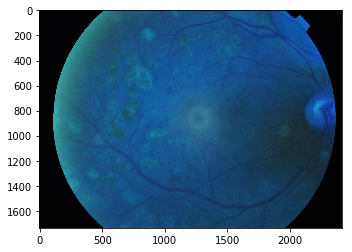

In [3]:
plt.imshow(frame)

In [4]:
imR, imG, imB = frame[:,:,0],frame[:,:,1],frame[:,:,2]

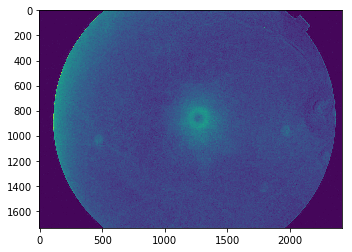

In [5]:
plt.imshow(imR)

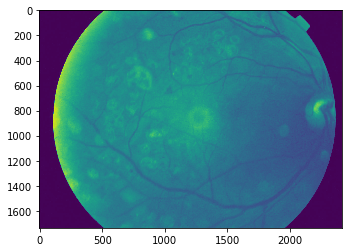

In [6]:
plt.imshow(imG)

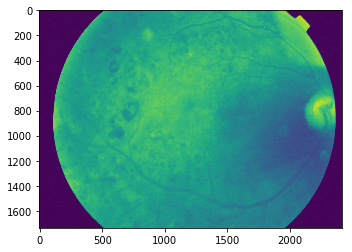

In [7]:
plt.imshow(imB)

In [8]:
equR, equG, equB  = cv2.equalizeHist(imR), cv2.equalizeHist(imG), cv2.equalizeHist(imB)

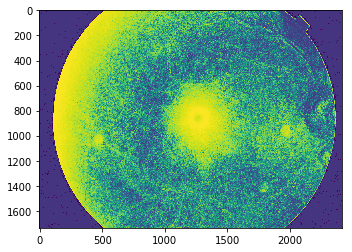

In [9]:
plt.imshow(equR)

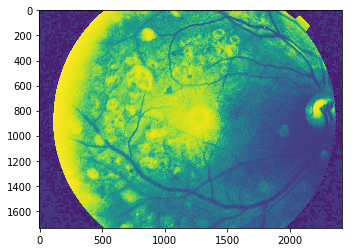

In [10]:
plt.imshow(equG)

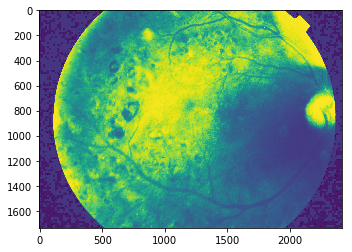

In [11]:
plt.imshow(equB)

In [12]:
nR, nG, nB  = np.max(equR) - equR, np.max(equG) - equG, np.max(equB) - equB

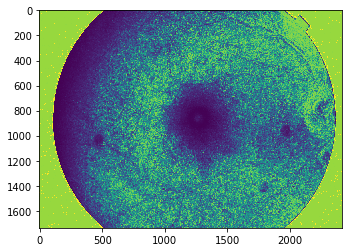

In [13]:
plt.imshow(nR)

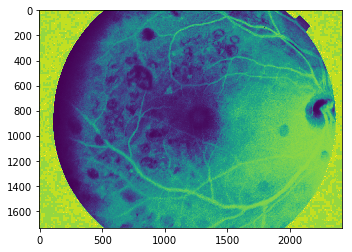

In [14]:
plt.imshow(nG)

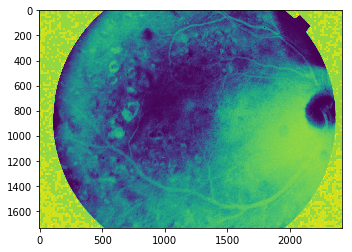

In [15]:
plt.imshow(nB)

In [16]:
np.mean(nR), np.mean(nG), np.mean(nB)

(119.89372811250648, 125.03103493987854, 124.96940185628834)

In [17]:
tmR, tmG, tmB  = (nR < np.mean(nR)*1.5)*nR , (nG < np.mean(nG)*1.5)*nG, (nB < np.mean(nB)*1.5)*nB

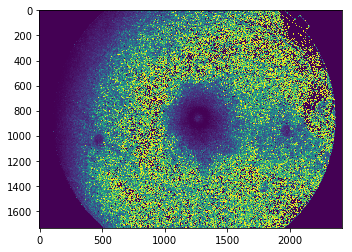

In [18]:
plt.imshow(tmR)

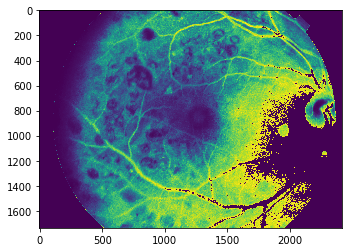

In [19]:
plt.imshow(tmG)

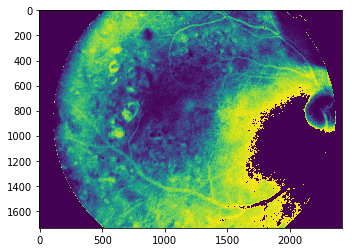

In [20]:
plt.imshow(tmB)

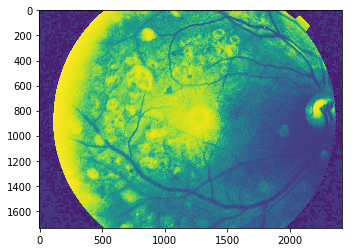

In [21]:
plt.imshow(equG)

In [22]:
from scipy.ndimage.filters import gaussian_filter

In [23]:
blR, blG, blB = gaussian_filter(nR, sigma=50), gaussian_filter(nG, sigma=50), gaussian_filter(nB, sigma=50)

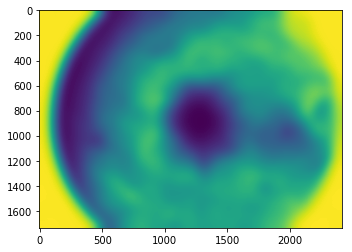

In [24]:
plt.imshow(blR)

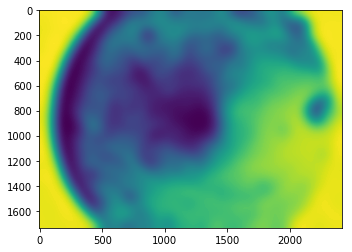

In [25]:
plt.imshow(blG)

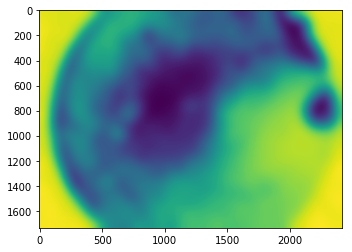

In [26]:
plt.imshow(blB)

In [27]:
fR, fG, fB = (blR < np.mean(blR) )* nR, (blG < np.mean(blG) )* nG, (blB < np.mean(blB) )* nB

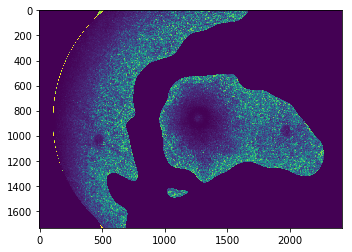

In [28]:
plt.imshow(fR)

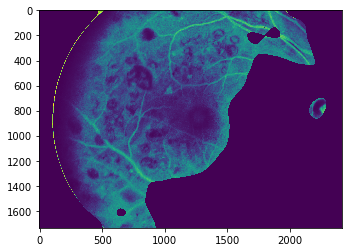

In [29]:
plt.imshow(fG)

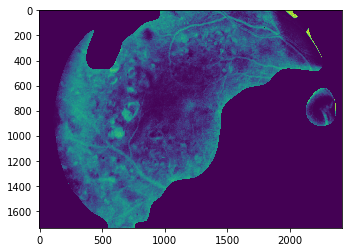

In [30]:
plt.imshow(fB)

In [31]:
ifR, ifG, ifB = fR, fG, fB
ifR, ifG, ifB = ifR/np.mean(fR), ifG/np.mean(fG), ifB/np.mean(fB)

In [32]:
pifR, pifG, pifB = ifR**2, ifG**2, ifB**2

In [33]:
[np.mean(pifR), np.max(pifR), np.min(pifR), np.max(pifR) - np.min(pifR)],[np.mean(pifG), np.max(pifG), np.min(pifG), np.max(pifG) - np.min(pifG)], [np.mean(pifB), np.max(pifB), np.min(pifB), np.max(pifB) - np.min(pifB)] 

([3.4582386036616786, 74.49939759483777, 0.0, 74.49939759483777],
 [2.616356789622364, 50.268987800325874, 0.0, 50.268987800325874],
 [2.632534603160266, 53.827913319939846, 0.0, 53.827913319939846])

In [34]:
pifR, pifG, pifB = pifR * (255/np.max(pifR)), pifG * (255/np.max(pifG)), pifB * (255/np.max(pifB))

In [35]:
pifR, pifG, pifB = pifR.astype(int), pifG.astype(int), pifB.astype(int)

In [36]:
[np.mean(pifR), np.max(pifR), np.min(pifR), np.max(pifR) - np.min(pifR)],[np.mean(pifG), np.max(pifG), np.min(pifG), np.max(pifG) - np.min(pifG)], [np.mean(pifB), np.max(pifB), np.min(pifB), np.max(pifB) - np.min(pifB)] 

([11.603767223883786, 254, 0, 254],
 [13.063504249702445, 254, 0, 254],
 [12.25030470824305, 255, 0, 255])

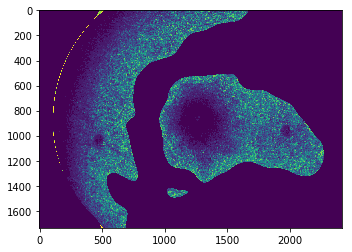

In [37]:
plt.imshow(pifR**0.5)

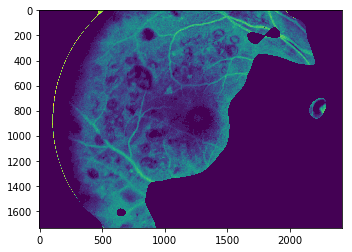

In [38]:
plt.imshow(pifG**0.5)

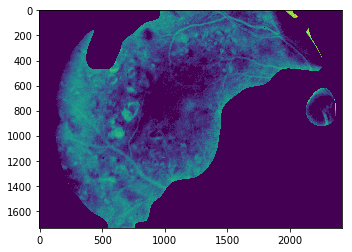

In [39]:
plt.imshow(pifB**0.5)

In [40]:
frame1 = frame

In [41]:
frame1[:,:,0],frame1[:,:,1],frame1[:,:,2] = pifR, pifG, pifB

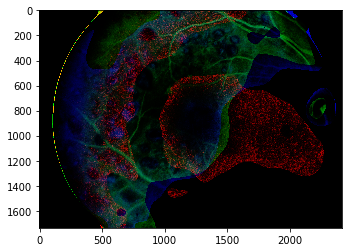

In [42]:
plt.imshow(frame1)

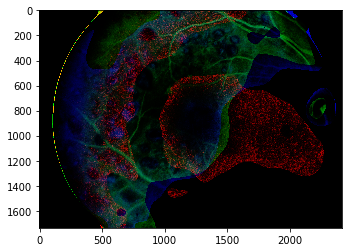

In [43]:
plt.imshow(frame)

In [44]:
fr = frame1

In [45]:
fr = cv2.resize(fr,(256,256), interpolation = cv2.INTER_AREA)

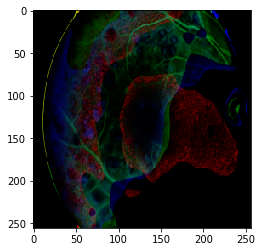

In [46]:
plt.imshow(fr)

## Reduce Size from 256 x 256 x 256 x 3 to 1 x 256 and retain relevant features

In [48]:
fg1 = np.max(fr**2) - fr**2
fg2 = (fg1>245) * fg1

In [54]:
fg3 = (fg2>=248) * 255
fg3 = fg3[:,:,1]

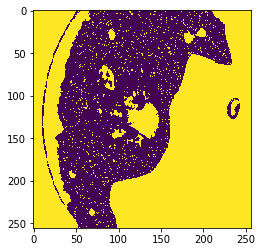

In [55]:
plt.imshow(fg3)

## Compile into a single function

In [56]:
def reading_preprocessing(name):
    folder_path = 'dataset/trainimages/' + name + '.png'
    frame = cv2.imread(path)
    imR, imG, imB = frame[:,:,0],frame[:,:,1],frame[:,:,2]
    equR, equG, equB  = cv2.equalizeHist(imR), cv2.equalizeHist(imG), cv2.equalizeHist(imB)
    nR, nG, nB  = np.max(equR) - equR, np.max(equG) - equG, np.max(equB) - equB
    blR, blG, blB = gaussian_filter(nR, sigma=50), gaussian_filter(nG, sigma=50), gaussian_filter(nB, sigma=50)
    fR, fG, fB = (blR < np.mean(blR) )* nR, (blG < np.mean(blG) )* nG, (blB < np.mean(blB) )* nB
    ifR, ifG, ifB = fR, fG, fB
    ifR, ifG, ifB = ifR/np.mean(fR), ifG/np.mean(fG), ifB/np.mean(fB)
    pifR, pifG, pifB = ifR**2, ifG**2, ifB**2
    pifR, pifG, pifB = pifR * (255/np.max(pifR)), pifG * (255/np.max(pifG)), pifB * (255/np.max(pifB))
    pifR, pifG, pifB = pifR.astype(int), pifG.astype(int), pifB.astype(int)
    frame1 = frame
    frame1[:,:,0],frame1[:,:,1],frame1[:,:,2] = pifR, pifG, pifB
    fr = cv2.resize(frame1,(256,256), interpolation = cv2.INTER_AREA)
    fg = fr
    fg[:,:,0],fg[:,:,1],fg[:,:,2] = np.zeros((256,256)), fr[:,:,1], np.zeros((256,256))
    fg1 = np.max(fg**2) - fg**2
    fg2 = (fg1>245) * fg1
    fg3 = (fg2>=248) * 255
    q = fg3[:,:,1]
    return (q.reshape(256*256))/255  

In [57]:
def reading_preprocessing1(name):
    path = 'dataset/trainimages/' + name + '.png'
    frame = cv2.imread(path)
    imG = cv2.equalizeHist(frame[:,:,1])
    blG = gaussian_filter(np.max(imG) - imG, sigma=50)  
    fG = ( blG < np.mean(blG) )* (np.max(imG) - imG)
    pifG = (fG/np.mean(fG))**2
    pifG = (pifG * (255/np.max(pifG))).astype(int)
    frame[:,:,1] = pifG
    fr = cv2.resize(frame,(256,256), interpolation = cv2.INTER_AREA)
    fg = fr[:,:,1]
    fg1 = np.max(fg**2) - fg**2
    fg2 = (fg1>245) * fg1
    fg3 = (fg2>=248) * 255
    
    return (fg3.reshape(256*256))/255  